# **Projeto Python para Análise de Dados**

EBAC

Matheus Damasio Thrun

# **Compreensão dos Dados**.

O objetivo deste projeto é analisar os dados de crédito disponíveis dos clientes de uma instituição financeira. Para compreender os fatores que levam um cliente a não cumprir com suas obrigações financeiras, com base no comportamento.

As Etapas do projeto levam em consideração:
<li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>

Dados CSV: [link_dados_credito](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv)

# **1. Exploração de Dados**

Para ler os dados utilizamos o Pandas

In [28]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
#Na leitura foi utilizado o na_values que indica a representação dos valores faltantes.
df.head(n=10) #foi realizada a visualização das 10 primeiras linhas da tabela para verificar os dados.

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


A segunda coluna, denominada "default", indica se um cliente é `adimplente` (default = 0) ou `inadimplente` (default = 1).

O atributo de interesse (default) é a variável resposta ou variável dependente, os demais atributos são variáveis explicatívas, variáveis independentes ou até variáveis preditoras.

Para verificar os atributos importados nos dados do arquivo temos uma descrição completa dos atributos abaixo:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


#**1.1 Estrutura**

Com os dados, conseguimos conhecer um pouco melhor a estrutura do conjunto de dados.

In [5]:
df.shape #O Shape retorna a quantidade linhas e colunas)

(10127, 16)

In [6]:
df[df['default'] == 0].shape #Quantidade linhas e colunas dos adimplentes

(8500, 16)

In [7]:
df[df['default'] == 1].shape #Quantidade linhas e colunas dos inadimplentes

(1627, 16)

In [3]:
qtd_total, _ = df.shape #armazena o número total de linhas no DataFrame e o _ é usado para ignorar o número de colunas.
qtd_adimplentes, _ = df[df['default'] == 0].shape # O shape é usado para obter o número de linhas com a quantidade de clientes adimplentes, que é armazenado em qtd_adimplentes.
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


A partir dos dados, verificaos que:

1. A maioria dos clientes (83,93%) está em dia com suas obrigações financeiras.

2. A taxa de inadimplência de (16,07%) é relativamente baixa.

**Possíveis Ações**: Pode ser considerado estratégias para reduzir ainda mais a inadimplência, como oferecer incentivos para pagamentos em dia ou melhorar a comunicação com clientes inadimplentes e melhorar o desempenho financeiro da empresa.

##**1.2 Schema**

Ulitizaremos o dtypes para verificar qual o tipo de dado de cada coluna do df.

In [8]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


É importante destacar que os atributos `limite_credito` e `valor_transacoes_12m` estão definidos como tipo objeto, o que não é adequado, uma vez que representam números decimais. Portanto, na etapa de limpeza de dados, é necessário converter esses atributos para o tipo float.

**Atributos Categóricos**

Com o Pandas podemos obter uma descrição estatística dos dados.


In [9]:
df.select_dtypes('object').describe().transpose()
#df.select_dtypes('object'): Seleciona apenas as colunas cujo tipo de dado é 'object', as colunas que contêm dados não numéricos.
#.describe(): Gera estatísticas descritivas das colunas selecionadas.
#.transpose(): Este método inverte as linhas e colunas da tabela resultante, facilitando a visualização dos resultados.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Observa-se que, para os atributos `escolaridade`, `estado_civil` e `salario_anual`, a quantidade de entradas é inferior a 10.127, indicando a presença de dados faltantes que precisam ser tratados.

Além disso, os atributos `limite_credito` e `valor_transacoes_12m` estão classificados de forma inadequada.

**Atributos Numéricos**

O Pandas também nos auxilía para gerar uma descrição estatística das colunas numéricas do DataFrame.


In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()
#df.drop('id', axis=1): remove a coluna id do df.
#.select_dtypes('number'): Seleciona apenas as colunas com dados numéricos (int e floats).
#.describe(): fornece estatísticas descritivas para as colunas numéricas.

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


A visualização acima indica que não há dados faltantes em nenhum dos atributos numéricos e que o atributo `qtd_transacoes_12m` apresenta um desvio elevado, o que significa que os dados estão bastante dispersos.

###**1.3 Dados Faltantes**

Os dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

Como já foi determinado como os dados faltantes estão especificados como `(na)`, o próximo passo é identificar em quais colunas esses dados se encontram.

In [11]:
df.head()
df.isna().any()
#df.isna(): Este método retorna True se o valor correspondente for NaN e False se não tiver dados faltantes.
#.any(): Verifica se há pelo menos um valor True em cada coluna.

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


Como suspeitamos em análises anteriores, a `escolaridade`, `estado_civil` e `salario_anual` indicam que existe valores NaN ou seja, possuem dados faltantes nessas colunas.

A função abaixo levanta algumas estatísticas sobre as colunas dos dados faltantes.

In [12]:
#1.Definição da Função:
def stats_dados_faltantes(df: pd.DataFrame) -> None: #Função que analisa um DataFrame do pandas (df) para identificar e relatar a quantidade e a porcentagem de dados faltantes em cada coluna.

#2.Inicialização da Lista:
  stats_dados_faltantes = [] #lista vazia criada para armazenar as estatísticas de dados faltantes de cada coluna.

#3.Loop
  for col in df.columns: #inicia um loop que percorre todas as colunas do DataFrame df.
    if df[col].isna().any(): #Para cada coluna, verifica-se se há algum valor faltante (NaN). Se houver, o código dentro do bloco if será executado.
      qtd, _ = df[df[col].isna()].shape #Conta a quantidade de valores faltantes na coluna atual, utilizando a filtragem do df para selecionar apenas as linhas com NaN.
                                        #obtendo a forma (shape) desse subconjunto.
      total, _ = df.shape #Obtém o número total de linhas no DataFrame.
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}} #Dicionário criado para armazenar a quantidade de dados faltantes e a porcentagem de dados faltantes em relação ao total de linhas.
      #A porcentagem é arredondada para duas casas decimais.
      stats_dados_faltantes.append(dict_dados_faltantes) #O dicionário criado é adicionado à lista stats_dados_faltantes.

  for stat in stats_dados_faltantes: #Função itera sobre a lista de estatísticas coletadas

#4.Impressão das Estatísticas:
    print(stat)

Para verificar se os dados faltantes alteram a proporção da quantidade de dados dos atributos: `escolaridade`, `estado_civil` e `salario_anual`.

In [13]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Pode-se observar que a proporção de dados faltantes permanece praticamente a mesma para os três atributos nos três DataFrames analisados. Isso significa que podemos remover as linhas com dados faltantes sem introduzir distorcer os dados.

## 2\. Transformação e Limpeza de Dados


### **2.1 Correção de schema**

Na fase de exploração, observamos que as colunas `limite_credito` e `valor_transacoes_12m` estavam sendo interpretadas como colunas categóricas (dtype = object). Portanto, neste momento, utilizaremos uma função `lambda para corrigir essa situação.

In [16]:
#1. Função lambda para corrigir
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

#2. Aplicando a função lambda nas colunas
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [17]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


Vamos analisar os atributos numéricos para entender como os atributos `limite_credito` e `valor_transacoes_12m` se comportam.

In [18]:
df.select_dtypes('object').describe().transpose()
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Podemos notar que os atributos numéricos `limite_credito` e `valor_transacoes_12m` apresentam um desvio padrão alto, o que indica uma grande dispersão dos valores. Isso sugere que esses atributos são bastante individualizados para cada cliente.

### **2.2. Remoção de Dados Faltantes**

Para remover todas as linhas do DataFrame df que contêm valores ausentes, alterando o próprio DataFrame em vez de criar uma nova cópia, utilizamos o codigo abaixo na biblioteca Pandas do Python para manipulação de dados.

In [19]:
df.dropna(inplace=True) #dropna(): Este método é usado para remover as linhas ou colunas que contêm valores ausentes (NaN - Not a Number) do df.
#inplace=True: Este argumento indica operação realizada diretamente no df original, em vez de retornar uma nova cópia do df sem os valores ausentes.

Vamos analisar a estrutura dos dados novamente.

In [20]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Como esperado, as proporções de clientes adimplentes e inadimplentes, após a exclusão dos dados faltantes, se mantiveram praticamente inalteradas. Dessa forma, as fases de exploração e limpeza dos dados foram finalizadas com êxito, permitindo que avancemos para a etapa de visualização dos dados.

## 3\. Visualização de Dados

Neste momento, vamos criar várias visualizações comparativas para gerar insights que nos ajudem a responder ao nosso objetivo: identificar quais atributos estão relacionados à adimplência e quais estão associados à inadimplência dos clientes.

Começamos importando os pacotes `Seaborn` e `Matplotlib.pyplot`.

O `Seaborn` é uma `biblioteca de visualização` de dados baseada no Matplotlib, que fornece uma interface mais amigável e recursos avançados para criar gráficos estatísticos de forma mais intuitiva.

Já o `Matplotlib.pyplot` é uma biblioteca fundamental para a `criação de gráficos` em Python, permitindo a geração de visualizações personalizadas e detalhadas. Após a importação, separaremos os clientes adimplentes e inadimplentes para facilitar a análise.

In [21]:
# 1.Importando as Bibliotecas:
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Configuração do Estilo dos Gráficos:
sns.set_style("whitegrid")
#set_style(): Este método é usado para configurar o estilo dos gráficos.
#"whitegrid": Este é um dos estilos disponíveis que adiciona uma grade clara ao fundo dos gráficos e ajuda visualizar melhor os dados.

# 3.Filtragem dos Dados:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

### **3.1. Visualizações Categóricas**

Analisando o atributo Escolaridade:

<ipython-input-22-027385908a5d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90) #Este comando ajusta os rótulos do eixo X do gráfico e rotaciona
<ipython-input-22-027385908a5d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90) #Este comando ajusta os rótulos do eixo X do gráfico e rotaciona
<ipython-input-22-027385908a5d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90) #Este comando ajusta os rótulos do eixo X do gráfico e rotaciona


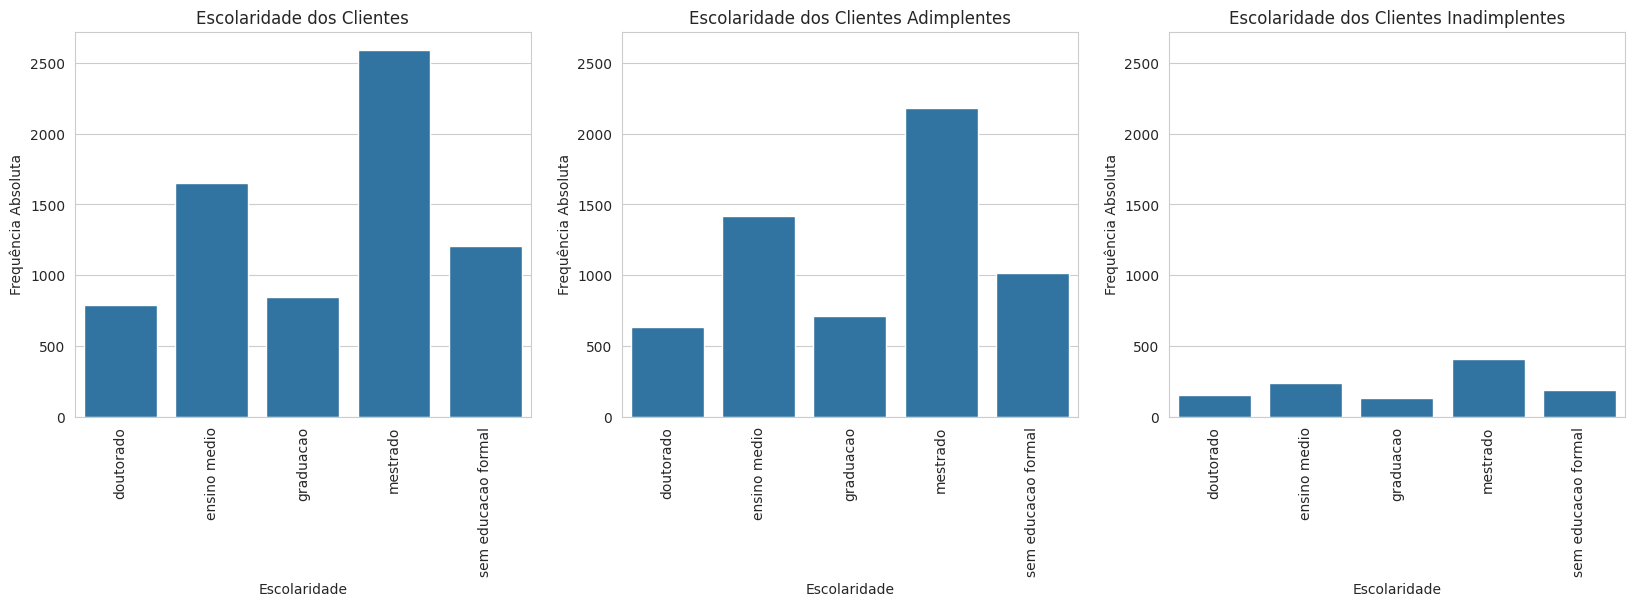

In [22]:
#1.Definições Iniciais:
coluna = 'escolaridade' #Define a coluna que será analisada.
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'] #Lista de títulos para os gráficos.
eixo = 0 #Inicializa o índice para os eixos dos gráficos.
max_y = 0 #Inicializa a variável para armazenar o valor máximo do eixo Y.
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1 #Calcula um valor máximo para o eixo Y

#2.Criação da Figura:
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True) #Cria uma figura com 3 subgráficos lado a lado, compartilhando o eixo X e definindo o tamanho da figura.

#3.Laço para Criar Gráficos:
for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().reset_index()  #Conta a frequência de cada categoria da coluna "escolaridade" e cria um novo DataFrame.
    df_to_plot.columns = [coluna, 'frequencia_absoluta'] #Renomeia as colunas do novo DataFrame.
    df_to_plot.sort_values(by=[coluna], inplace=True)  #Ordena os dados pela coluna "escolaridade".
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo]) #Cria um gráfico de barras usando Seaborn, onde o eixo X é a escolaridade e o Y é a frequência absoluta.
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta') #Define o título e os rótulos dos eixos.
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90) #Este comando ajusta os rótulos do eixo X do gráfico e rotaciona
    _, max_y_f = f.get_ylim() #get_ylim() retorna uma tupla com os limites inferior e superior do eixo Y.
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1 #Incrementa o índice do eixo para o próximo gráfico.

# 4.Exibição da Figura:
figura.show()

Podemos observar que o atributo escolaridade não é pertinente para o objetivo do projeto, uma vez que a distribuição permanece similar nos três gráficos.
Por isso vamos analisar outro atributo o `tipo_cartao`:

<ipython-input-23-7822a52f3ed4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-23-7822a52f3ed4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-23-7822a52f3ed4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)


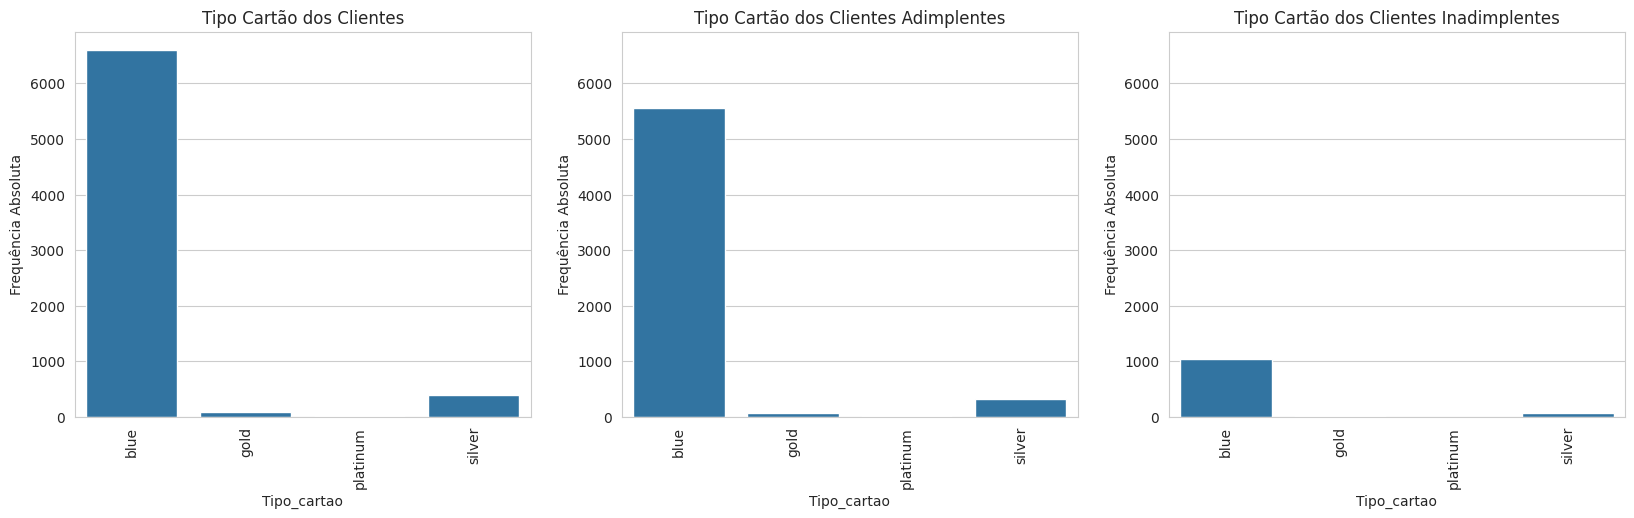

In [23]:
#1.Definições Iniciais:
coluna = 'tipo_cartao'
titulos = ['Tipo Cartão dos Clientes', 'Tipo Cartão dos Clientes Adimplentes', 'Tipo Cartão dos Clientes Inadimplentes']

#2.Criação da Figura:
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

#3.Laço para Criar Gráficos:
for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

# 4.Exibição da Figura:
figura.show()

Para esse atributo, podemos notar algo interessante: embora haja poucos clientes com o cartão gold, todos são adimplentes. Além disso, não existem clientes com cartão platinum na base de dados.

### **3.2. Visualizações Numéricas**

Nesta etapa vamos analisar os `atributos numéricos` utilizando as bibliotecas `matplotlib` e `seaborn` para criar `histogramas` da `Quantidade de transações nos Últimos 12 Meses`.

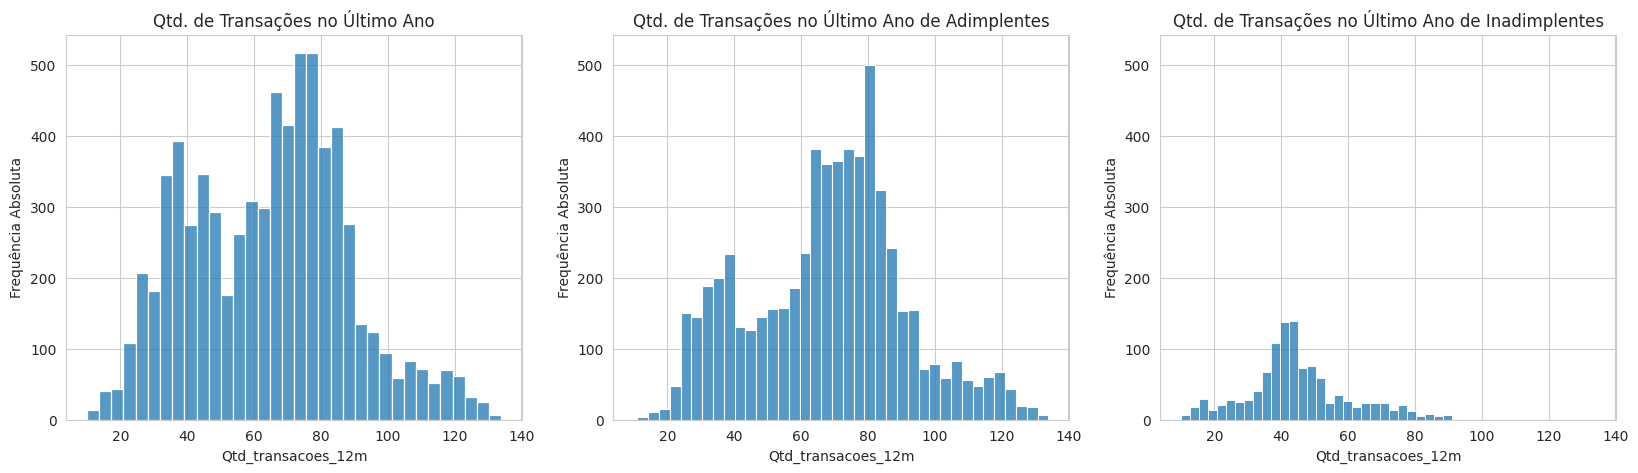

In [24]:
# 1.Definição de Variáveis:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

# 2.Configuração Inicial:
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

# 3.Loop para Plotagem:
for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# 4.Exibição da Figura:
figura.show()

O gráfico que representa todos os clientes, observamos dois picos: um próximo a 40 transações e outro em torno de 80 transações. O gráfico dos adimplentes, embora os dois picos sejam semelhantes, o pico em torno de 40 transações é mais suave. Por outro lado, ao analisarmos o gráfico dos inadimplentes, notamos um pico em torno de 40 transações, que complementa o que falta no gráfico dos clientes adimplentes. Assim, podemos concluir que o atributo `qtd_transacoes_12m` provavelmente é um dos fatores que levam um cliente a não cumprir com suas obrigações financeiras

Agora vamos verificar o atributo `Valor das transações nos últimos 12 Meses`.


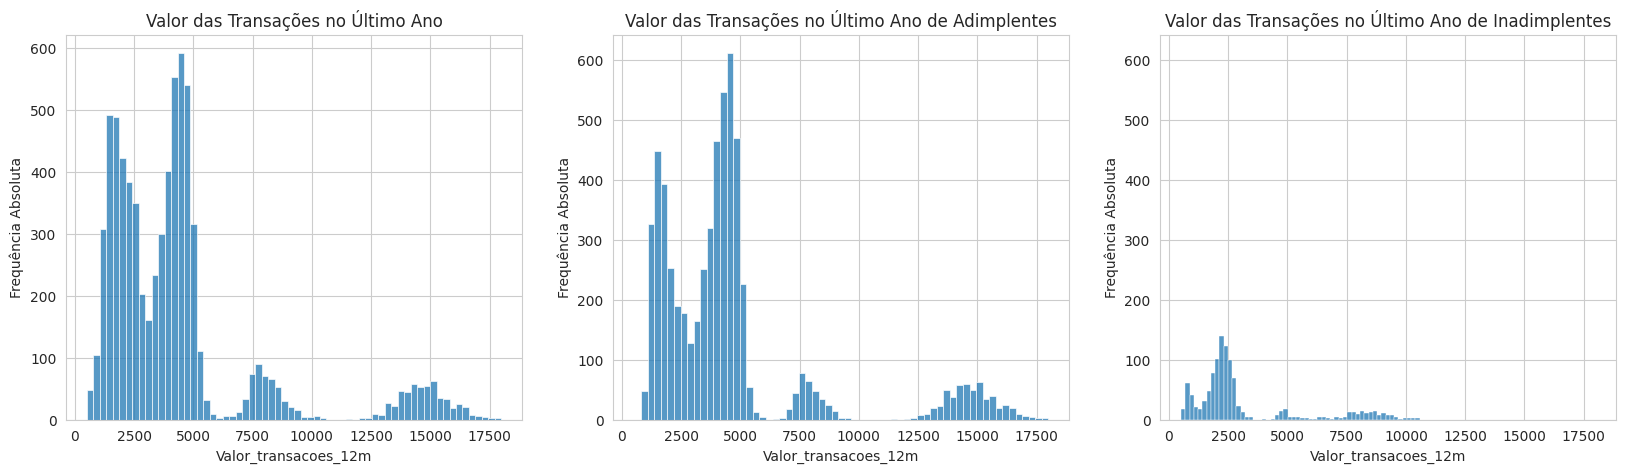

In [25]:
# 1.Definição de Variáveis:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

# 2.Configuração Inicial:
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

# 3.Loop para Plotagem:
for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# 4.Exibição da Figura:
figura.show()

Um padrão semelhante é observado com o atributo `valor_transacoes_12m`, assim como aconteceu com o atributo `qtd_transacoes_12m`.
Em transações com valor entorno de 2.500, o que está ausente no gráfico dos clientes adimplentes é complementado pelo que aparece no gráfico dos clientes inadimplentes.

Após identificarmos dois atributos numéricos que estão relacionados ao objetivo do projeto, vamos analisar como o status de inadimplência se distribui ao considerarmos esses dois atributos em conjunto:



**Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses**

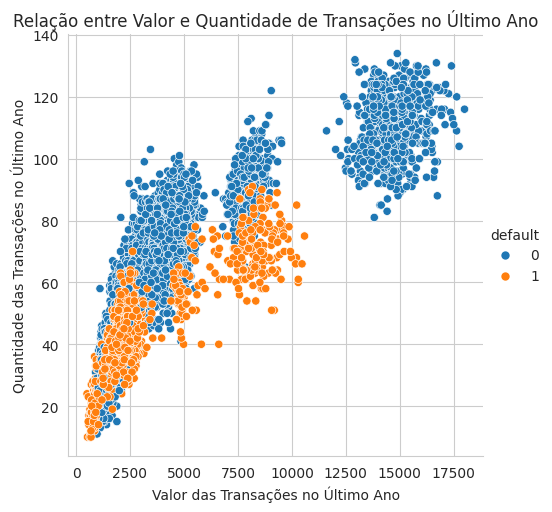

In [26]:
 #1. Criação  do Gráfico
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
#sns.relplot(...): Cria o gráfico de dispersão.
#hue: Adiciona uma dimensão de cor com base na coluna default.

#2.Configuração do Gráfico
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )
#f.set(): Permite personalizar o gráfico.


Ao analisarmos o gráfico, podemos observar a presença de dois grupos distintos, um contendo clientes adimplentes e outro com clientes inadimplentes, além de um grupo exclusivo de adimplentes.

Focando nos grupos que incluem apenas adimplentes, concluímos que clientes com um número elevado de transações (acima de 80) e valores altos (superiores a 12 mil) tendem a ser adimplentes.

Quanto aos grupos que incluem clientes inadimplentes, podemos identificar as seguintes combinações entre valor de transação e quantidade de transações:

Tendência à inadimplência:
* Quantidade de transações até 60, com valores próximos a 3.000:
* Quantidade de transações de 40 a 90, com valores entre 3.000 e 10.000

Tendência à adimplência.
* Quantidade de transações de 60 a 100, com valores entre 2.500 e 5.000
* Quantidade de transações de 90 a 120, com valores entre 7.500 e 9.000

## 3\. Conclusão sobre Adimplência e Inadimplência


A análise dos dados revela padrões significativos em relação à adimplência e inadimplência dos clientes. Observamos que clientes adimplentes tendem a realizar um maior número de transações, especialmente quando esses valores são elevados. Especificamente, aqueles com mais de 80 transações e valores superiores a 12 mil demonstram uma forte probabilidade de manterem-se adimplentes.

Por outro lado, os clientes inadimplentes apresentam características distintas. A análise indica que transações com quantidades até 60 e valores próximos a 3.000, bem como combinações de 40 a 90 transações com valores entre 3.000 e 10.000, estão associadas a uma maior tendência à inadimplência. No entanto, também identificamos que algumas faixas de transações e valores, como 60 a 100 transações com valores entre 2.500 e 5.000, e 90 a 120 transações com valores entre 7.500 e 9.000, podem indicar uma tendência à adimplência.

Essas conclusões sugerem que o monitoramento das quantidades e valores das transações pode ser uma estratégia eficaz para prever e gerenciar o risco de inadimplência entre os clientes.